<h1 style="text-align:center;font-size:200%;;">Heart Attack</h1>
<h2 style="text-align:center;font-size:100%;;">Classification using DT</h2><br>
<h4 style="text-align:left;">Réaliser par  :Marouan Daghmoumi & Abderrazzak El Bourkadi & </h4>
<h4 style="text-align:left;">Encadré par  : Pr. Abdellah AZMANI</h4>

## About this Dataset

- **Age**: Age of the patient

- **Sex**: Sex of the patient

- **exang**: Exercise induced angina (1 = yes; 0 = no)

- **ca**: Number of major vessels (0-3)

- **cp**: Chest Pain type

  - Value 1: Typical angina
  - Value 2: Atypical angina
  - Value 3: Non-anginal pain
  - Value 4: Asymptomatic

- **trtbps**: Resting blood pressure (in mm Hg)

- **chol**: Cholesterol in mg/dl fetched via BMI sensor

- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

- **rest_ecg**: Resting electrocardiographic results

  - Value 0: Normal
  - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

- **thalach**: Maximum heart rate achieved

- **target**: 

  - 0 = Less chance of heart attack
  - 1 = More chance of heart attack


## 1. Importation des librairies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.svm import SVC

## 2. Collecte des données

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
print(data)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

## 3. exploration et visualisation des données

In [4]:
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
data.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
data.shape

(303, 14)

##### Alors on a 13 features et 303 exemple

In [7]:
data.shape


(303, 14)

### 1. People More Chance of Heart Attack

In [8]:
attack = data [ data['output']==1  ]
attack 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
print('Le nombre de personnes qui ont une chance d\'avoir une crise cardiaque est :', len(attack))

Le nombre de personnes qui ont une chance d'avoir une crise cardiaque est : 165


In [10]:
print('Le pourcentage des personnes qui ont une chance d\'avoir une crise cardiaque est : {:.2%}'.format(len(attack) / len(data)))

Le pourcentage des personnes qui ont une chance d'avoir une crise cardiaque est : 54.46%


### 2. People Less Chance of Heart Attack

In [11]:
less_attack = data [ data['output']==0  ]
less_attack 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
print('Le nombre de personnes qui ont une chance d\'avoir moins de risques d\'attaque cardiaque est :', len(less_attack))

Le nombre de personnes qui ont une chance d'avoir moins de risques d'attaque cardiaque est : 138


In [13]:
print('Le pourcentage des personnes qui ont une chance d\'avoir moins de risques d\'attaque cardiaque est : {:.2%} '.format(len(less_attack) / len(data)))

Le pourcentage des personnes qui ont une chance d'avoir moins de risques d'attaque cardiaque est : 45.54% 


# 4. préparation des données pour l'entrainement  

<Axes: >

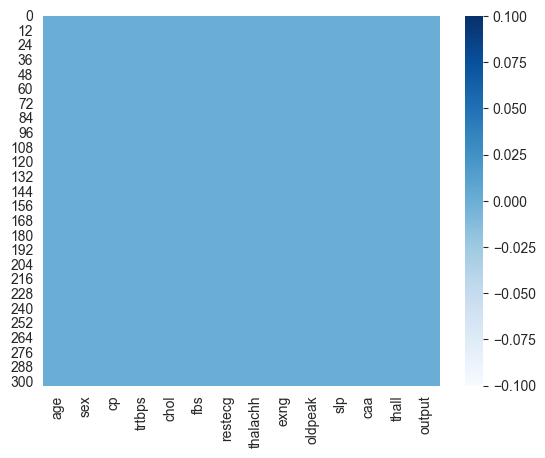

In [14]:
# affichage des données manquantes
sns.heatmap(data.isnull(), cmap = 'Blues')

les donnees son complete . 

In [15]:
# Splitting the data into features (X) and target variable (y)
X = data.drop('output', axis=1)
y = data['output']

In [16]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [19]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [20]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier()

In [22]:
# Training the Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
# Making predictions on the test set
y_pred = clf.predict(X_test)

In [24]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.41%


In [25]:
# Create and fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

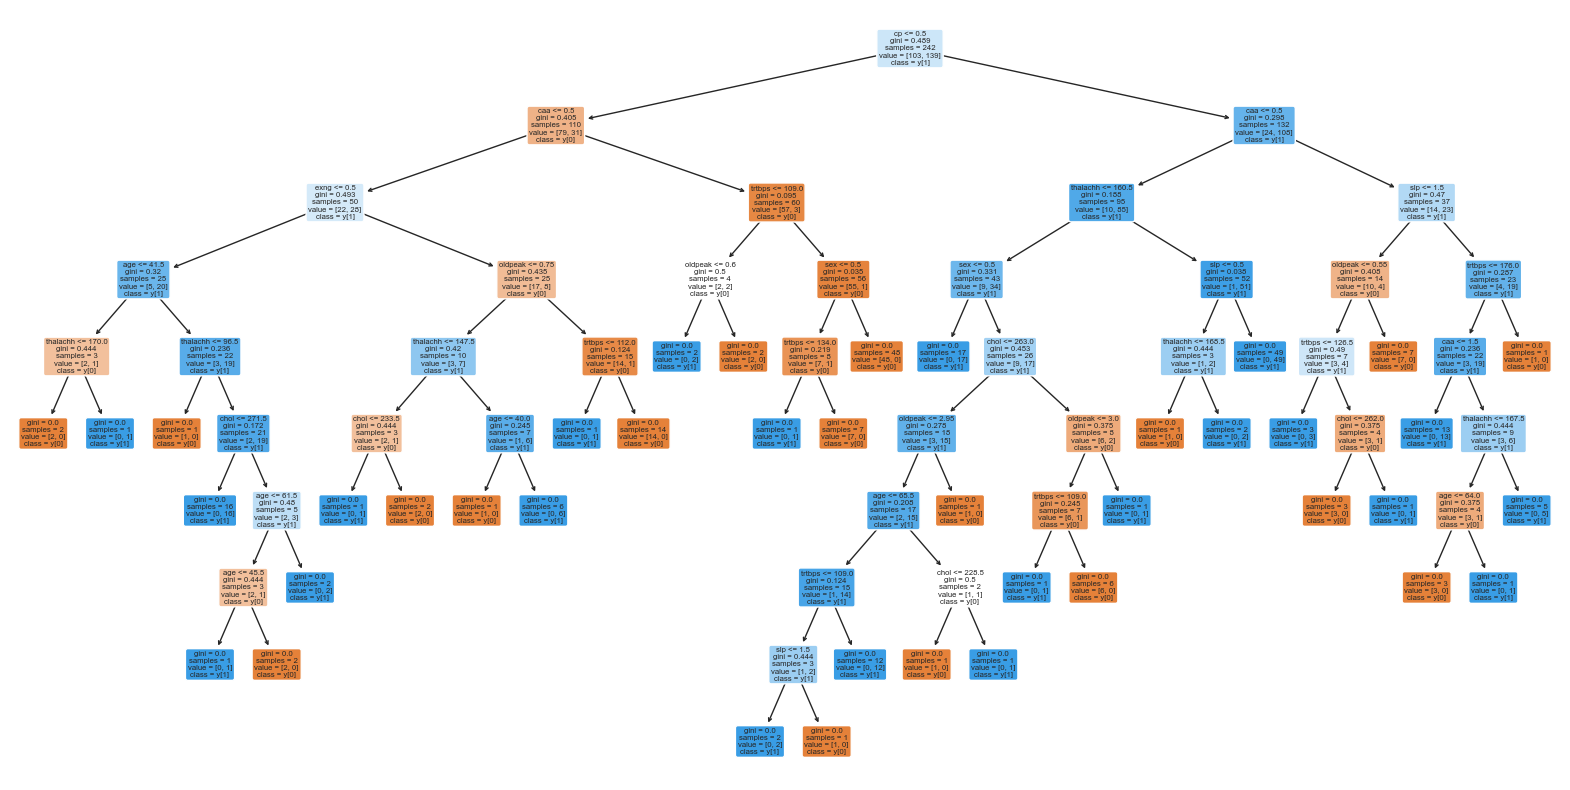

In [26]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=data.columns[:-1], class_names=True, rounded=True)
plt.show()

In [29]:
# Initialize the SVM classifier
svm_model = SVC(kernel='linear')  # You can change the kernel as needed (linear, rbf, etc.)

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 77.05
